# Multidimensional Scaling and the Senate

In [2]:
# File-Name:       chapter09.R
# Date:            2012-02-10                                
# Author:          Drew Conway (drew.conway@nyu.edu)
# Purpose:         Code for Chapter 4.  In this case study we introduce multidimensional scaling (MDS),
#                   a technique for visually displaying the simialrity of observations in 
#                   mutlidimensional space.  We begin with with a very simple example using simulated
#                   data.  Next, we perform the same analysis on real data, using Senate roll call vote 
#                   data.  We first must get this data into workable format, then analyze with MDS
# Data Used:       *.dta files in code/data/, source: http://www.voteview.com/dwnl.htm
# Packages Used:   foreign, ggplot2

# All source code is copyright (c) 2012, under the Simplified BSD License.  
# For more information on FreeBSD see: http://www.opensource.org/licenses/bsd-license.php

# All images and materials produced by this code are licensed under the Creative Commons 
# Attribution-Share Alike 3.0 United States License: http://creativecommons.org/licenses/by-sa/3.0/us/

# All rights reserved.

# Load libraries
library('foreign')
library('ggplot2')

### Simulated analysis to review the technique

# Some sample code to understand matrix multiplication

In [3]:
set.seed(851982) # To make sure results are consistent
ex.matrix <- matrix(sample(c(-1, 0, 1), 24, replace = TRUE),
                    nrow = 4,
                    ncol = 6)
row.names(ex.matrix) <- c('A', 'B', 'C', 'D')
colnames(ex.matrix) <- c('P1', 'P2', 'P3', 'P4', 'P5', 'P6')

In [4]:
ex.matrix

#P1 P2 P3 P4 P5 P6
#A 0 -1 0 -1 0 0
#B -1 0 1 1 1 0
#C 0 0 0 1 -1 1
#D 1 0 1 -1 0 0

# Convert matrix to customer-by-customer matrix

,P1,P2,P3,P4,P5,P6
A,0,-1,0,-1,0,0
B,-1,0,1,1,1,0
C,0,0,0,1,-1,1
D,1,0,1,-1,0,0


In [5]:
t(ex.matrix)

#A B C D
#P1 0 -1 0 1
#P2 -1 0 0 0
#P3 0 1 0 1
#P4 -1 1 1 -1
#P5 0 1 -1 0
#P6 0 0 1 0

,A,B,C,D
P1,0,-1,0,1
P2,-1,0,0,0
P3,0,1,0,1
P4,-1,1,1,-1
P5,0,1,-1,0
P6,0,0,1,0


In [6]:
# Calculate distance matrix
ex.mult <- ex.matrix %*% t(ex.matrix)
ex.mult

#A B C D
#A 2 -1 -1 1
#B -1 4 0 -1
#C -1 0 3 -1
#D 1 -1 -1 3

,A,B,C,D
A,2,-1,-1,1
B,-1,4,0,-1
C,-1,0,3,-1
D,1,-1,-1,3


In [7]:
sqrt(sum((ex.mult[1, ] - ex.mult[4, ]) ^ 2))
#[1] 2.236068

ex.dist <- dist(ex.mult)
ex.dist

#A B C
#B 6.244998
#C 5.477226 5.000000
#D 2.236068 6.782330 6.082763

[1] 2.236068

         A        B        C
B 6.244998                  
C 5.477226 5.000000         
D 2.236068 6.782330 6.082763

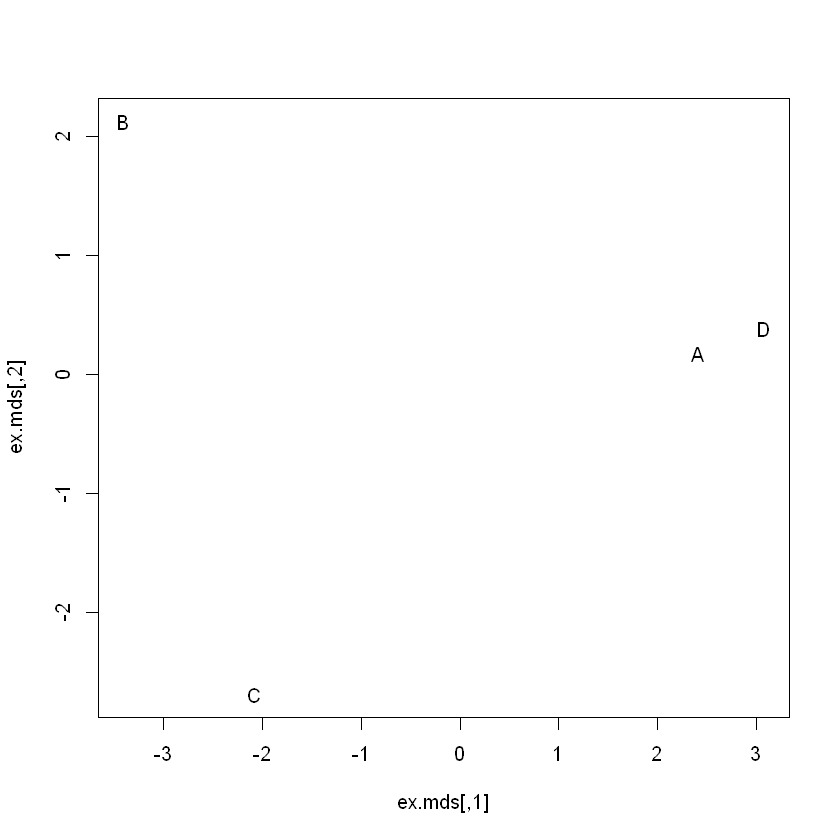

In [8]:
# Visualize clusters
ex.mds <- cmdscale(ex.dist)
plot(ex.mds, type = 'n')
text(ex.mds, c('A', 'B', 'C', 'D'))

In [9]:
# ?list.files  #  get a list of files in a directory, optionally matching a pattern

In [10]:
library('foreign')
library('ggplot2')

data.dir <- file.path(".")
data.files <- list.files(data.dir, pattern=".dta")

data.files <- setdiff(data.files, data.files[1]) # Remove 102nd Congress (we don't need to plot it)

data.files

#[1] "sen102kh.dta" "sen103kh.dta"
#[3] "sen104kh.dta" "sen105kh.dta"
#[5] "sen106kh.dta" "sen107kh.dta"
#[7] "sen108kh.dta" "sen109kh_7.dta"
#[9] "sen110kh.dta" "sen111kh_2008.dta"
#[11] "sen112kh.dta" "sen113kh.dta"
#[13] "sen114kh.dta"

[1] "sen103kh.dta"      "sen104kh.dta"      "sen105kh.dta"     
 [4] "sen106kh.dta"      "sen107kh.dta"      "sen108kh_7.dta"   
 [7] "sen109kh.dta"      "sen110kh_2008.dta" "sen111kh.dta"     
[10] "sen112kh.dta"      "sen113kh.dta"      "sen114kh.dta"

In [11]:
# Add all roll call vote data frames to a single list
rollcall.data <- lapply(data.files,
                        function(f)
                        {
                          read.dta(file.path(data.dir, f), convert.factors = FALSE)
                        })

In [12]:
dim(rollcall.data[[1]])
#[1] 103 647

head(rollcall.data[[1]])
#cong id state dist lstate party eh1 eh2 name V1 V2 V3 ... V638
#1 101 99908 99 0 USA 200 0 0 BUSH 1 1 1 ... 1
#2 101 14659 41 0 ALABAMA 100 0 1 SHELBY, RIC 1 1 1 ... 6
#3 101 14705 41 0 ALABAMA 100 0 1 HEFLIN, HOW 1 1 1 ... 6
#4 101 12109 81 0 ALASKA 200 0 1 STEVENS, TH 1 1 1 ... 1
#5 101 14907 81 0 ALASKA 200 0 1 MURKOWSKI, 1 1 1 ... 6
#6 101 14502 61 0 ARIZONA 100 0 1 DECONCINI, 1 1 1 ... 6

[1] 103 733

cong,id,state,dist,lstate,party,eh1,eh2,name,V1,...,V715,V716,V717,V718,V719,V720,V721,V722,V723,V724
103,99909,99,0,USA,100,0,0,CLINTON,9,...,9,1,9,9,9,1,1,1,1,1
103,14705,41,0,ALABAMA,100,0,0,HEFLIN,1,...,1,9,6,1,1,6,1,1,6,6
103,14659,41,0,ALABAMA,100,0,0,SHELBY,6,...,6,9,6,1,1,6,1,1,6,6
103,14907,81,0,ALASKA,200,0,0,MURKOWSKI,6,...,1,1,6,1,1,6,9,9,6,1
103,12109,81,0,ALASKA,200,0,0,STEVENS,6,...,9,9,9,9,9,9,9,9,6,6
103,14502,61,0,ARIZONA,100,0,0,DECONCINI,1,...,1,1,1,1,9,1,1,1,1,1


# What the following code does

The voting matrices have values like 1, 6, 9 in them --
and these get translated to zeroes and ones (and -1 when absent).

I believe the "pres" cases handle the very special cases in which
tie votes are broken by the president or vice president.
Vice President Pence actually did this recently.

In [13]:
# This function takes a single data frame of roll call votes and returns a 
# Senator-by-vote matrix.

rollcall.simplified <- function(df)
{
  no.pres <- subset(df, state < 99)
  
  for(i in 10:ncol(no.pres))
  {
    no.pres[,i] <- ifelse(no.pres[,i] > 6, 0, no.pres[,i])
    no.pres[,i] <- ifelse(no.pres[,i] > 0 & no.pres[,i] < 4, 1, no.pres[,i])
    no.pres[,i] <- ifelse(no.pres[,i] > 1, -1, no.pres[,i])
  }
    
  rc_data = no.pres[,10:ncol(no.pres)] # Get the vote subset of no.pres
  # Change the state number to names of the corresponding Senator
  # The 114th Congress does not have names, so numbers will be used instead in the heatmap  
#   row.names(rc_data) = make.names(gsub(' ','',no.pres$name), unique = TRUE) 
  row.names(rc_data) = make.names(gsub(' ','',no.pres$name), unique = TRUE) 
    
  return(as.matrix(rc_data)) # Return the simplified voting data  
}

rollcall.simple <- lapply(rollcall.data, rollcall.simplified)

In [14]:
# Multiply the matrix by its transpose to get Senator-to-Senator tranformation, 
# and calculate the Euclidan distance between each Senator.
rollcall.dist <- lapply(rollcall.simple, function(m) dist(m %*% t(m)))

# Do the multidimensional scaling
rollcall.mds <- lapply(rollcall.dist,
                       function(d) as.data.frame((cmdscale(d, k = 2)) * -1))

In [15]:
# Add identification information about Senators back into MDS data frames
congresses <- 103:114 # Congresses to plot

for(i in 1:length(rollcall.mds))
{
  names(rollcall.mds[[i]]) <- c("x", "y")
  
  congress <- subset(rollcall.data[[i]], state < 99)
  
  congress.names <- sapply(as.character(congress$name),
                           function(n) strsplit(n, "[, ]")[[1]][1])
  
  rollcall.mds[[i]] <- transform(rollcall.mds[[i]],
                                 name = congress.names,
                                 party = as.factor(congress$party),
                                 congress = congresses[i])
}

head(rollcall.mds[[1]])

#x y name party congress
#2 -11.44068 293.0001 SHELBY 100 101
#3 283.82580 132.4369 HEFLIN 100 101
#4 885.85564 430.3451 STEVENS 200 101
#5 1714.21327 185.5262 MURKOWSKI 200 101
#6 -843.58421 220.1038 DECONCINI 100 101
#7 1594.50998 225.8166 MCCAIN 200 101

,x,y,name,party,congress
HEFLIN,-737.0437,195.57124,HEFLIN,100,103
SHELBY,753.9675,228.58614,SHELBY,100,103
MURKOWSKI,3099.5658,34.50994,MURKOWSKI,200,103
STEVENS,2300.4695,441.42596,STEVENS,200,103
DECONCINI,-1951.3194,-147.79934,DECONCINI,100,103
MCCAIN,3335.0814,-303.89151,MCCAIN,200,103


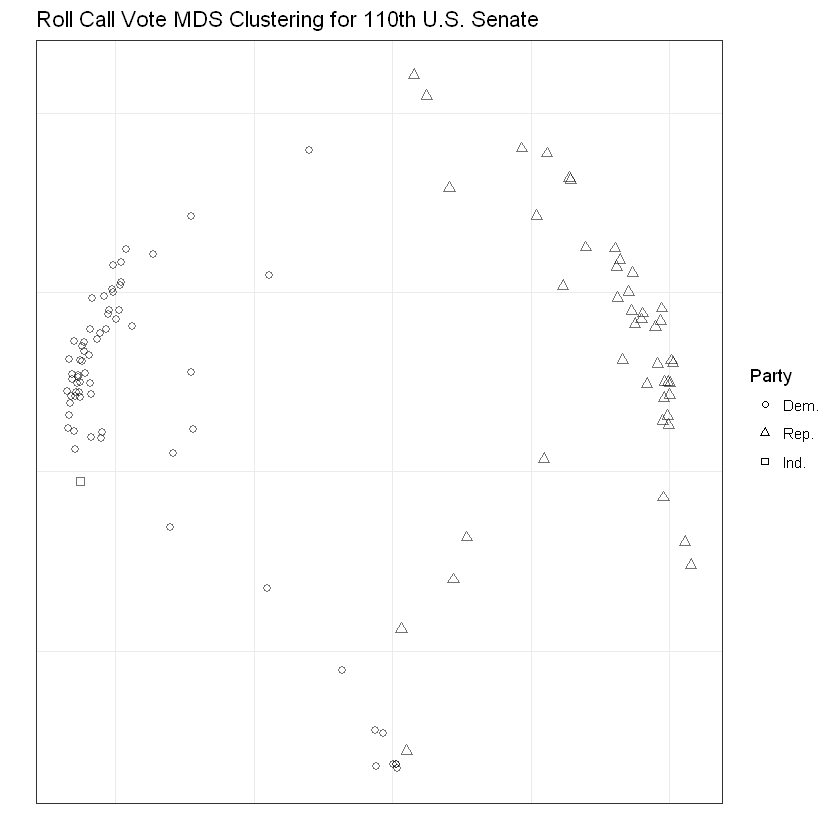

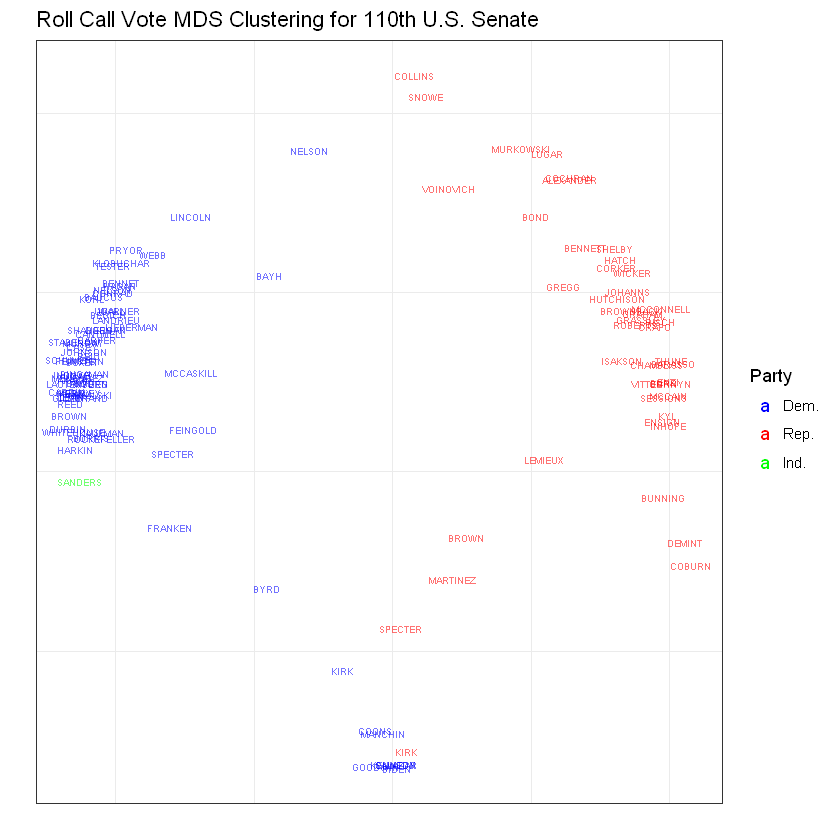

In [16]:
# Create a plot of just the 110th Congress
cong.110 <- rollcall.mds[[9]]

base.110 <- ggplot(cong.110, aes(x = x, y = y)) +
  scale_size(range = c(2,2), guide = 'none') +
  scale_alpha(guide = 'none') +
  theme_bw() +
  theme(axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        panel.grid.major = element_blank()) +
  ggtitle("Roll Call Vote MDS Clustering for 110th U.S. Senate") +
  xlab("") +
  ylab("") +
  scale_shape(name = "Party", breaks = c("100", "200", "328"),
              labels = c("Dem.", "Rep.", "Ind."), solid = FALSE) +
  scale_color_manual(name = "Party", values = c("100" = "blue",
                                                "200" = "red",
                                                "328" = "green"),
                     breaks = c("100", "200", "328"),
                     labels = c("Dem.", "Rep.", "Ind."))

print(base.110 + geom_point(aes(shape = party,
                                alpha = 0.75,
                                size = 2)))
print(base.110 + geom_text(aes(color = party,
                               alpha = 0.75,
                               label = cong.110$name,
                               size = 2)))

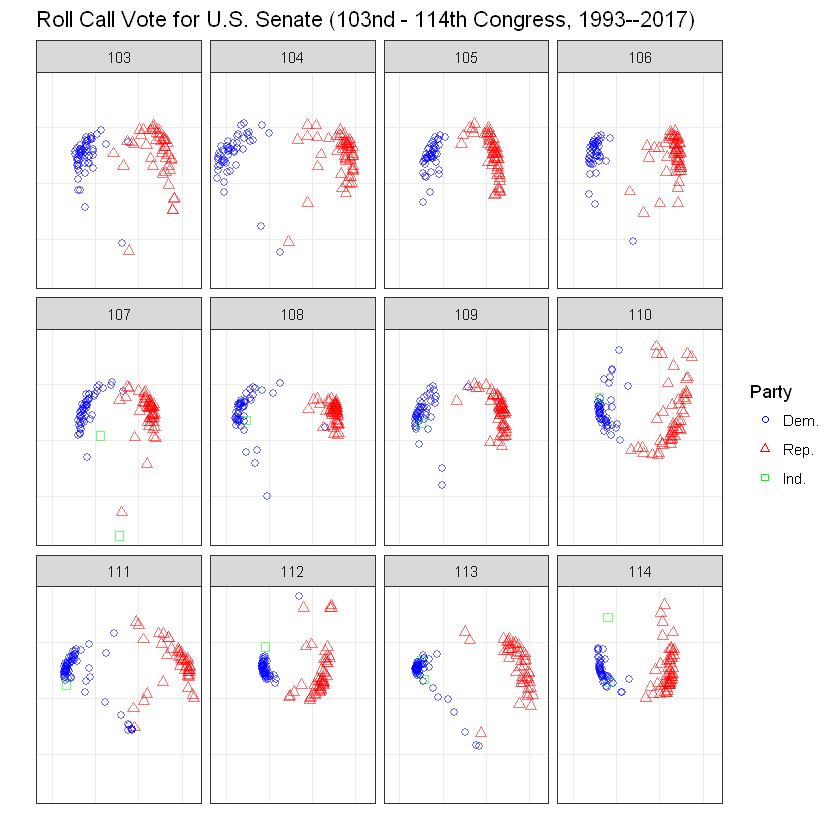

In [17]:
# Create a single visualization of MDS for all Congresses on a grid
all.mds <- do.call(rbind, rollcall.mds)
all.plot <- ggplot(all.mds, aes(x = x, y = y)) +
  geom_point(aes(shape = party, color = party, alpha = 0.75, size = 2)) +
  scale_size(range = c(2, 2), guide = 'none') +
  scale_alpha(guide = 'none') +
  theme_bw() +
  theme(axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        panel.grid.major = element_blank()) +
  ggtitle("Roll Call Vote for U.S. Senate (103nd - 114th Congress, 1993--2017)") + # Change titles for the 103rd - 114th Congress
       xlab("") +
       ylab("") +
       scale_shape(name = "Party",
                   breaks = c("100", "200", "328"),
                   labels = c("Dem.", "Rep.", "Ind."),
                   solid = FALSE) +
       scale_color_manual(name = "Party",
                   values = c("100" = "blue",
                              "200" = "red",
                              "328" = "green"),
                   breaks = c("100", "200", "328"),
                   labels = c("Dem.", "Rep.", "Ind.")) +
      facet_wrap(~ congress)

print(all.plot)

In [18]:
# This is the code omitted from the chapter.  This is used to create shnazy plots of everything!
if (FALSE) {

for(i in 1:length(rollcall.mds))
{
  mds <- rollcall.mds[[i]]
  congress <- congresses[i]
  plot.title <- paste("Roll Call Vote MDS Clustering for ",
                      congress,
                      " U.S. Senate",
                      sep = "")

  # Build base plot
  mds.plot <- ggplot(mds, aes(x = x, y = y)) +
    scale_size(range = c(2, 2), guide = 'none') +
    scale_alpha(guide = 'none') +
    theme_bw() +
    theme(axis.ticks = element_blank(), 
          axis.text.x = element_blank(),
          axis.text.y = element_blank(),
          panel.grid.major = element_blank()) +
    ggtitle(plot.title) +
    xlab("") +
    ylab("")
  

  # Build up point and text plots separately
  mds.point <- mds.plot + geom_point(aes(shape = party,
                                         alpha = 0.75,
                                         size = 2))
  mds.text <- mds.plot + geom_text(aes(color = party,
                                       alpha = 0.75,
                                       label = mds$name,
                                       size = 2))
  

  # Fix labels, shapes and colors
  if(length(levels(mds$party)) > 2)
  {
    mds.point <- mds.point + scale_shape(name = "Party",
                                         breaks = c("100", "200", "328"),
                                         labels = c("Dem.", "Rep.", "Ind."),
                                         solid = FALSE)
    mds.text <- mds.text + scale_color_manual(name = "Party",
                                              values = c("100" = "blue",
                                                         "200" = "red",
                                                         "328" = "green"),
                                              breaks = c("100", "200", "328"),
                                              labels = c("Dem.", "Rep.", "Ind."))
  } else {
    mds.point <- mds.point + scale_shape(name = "Party",
                                         breaks = c("100", "200"),
                                         labels = c("Dem.", "Rep."),
                                         solid = FALSE)
    mds.text <- mds.text + scale_color_manual(name = "Party",
                                              values = c("100" = "blue",
                                                         "200" = "red"),
                                              breaks = c("100", "200"),
                                              labels = c("Dem.", "Rep."))
  }
if (FALSE) {
  ggsave(plot = mds.point,
         filename = file.path('images',
                              'senate_plots',
                              paste(congress, "_point.pdf", sep = "")),
         width = 8,
         height = 5)
} else {
   print(mds.point)
}
    
if (FALSE) {
  ggsave(plot = mds.text,
         filename = file.path('images',
                              'senate_plots',
                              paste(congress, "_names.pdf", sep = "")),
         width = 8,
         height = 5)
} else {
  print(mds.text)
}

}
    
}

## (c) Extend the notebook to produce a biclustering visualization of the voting history of each Congress (103rd through 114th)

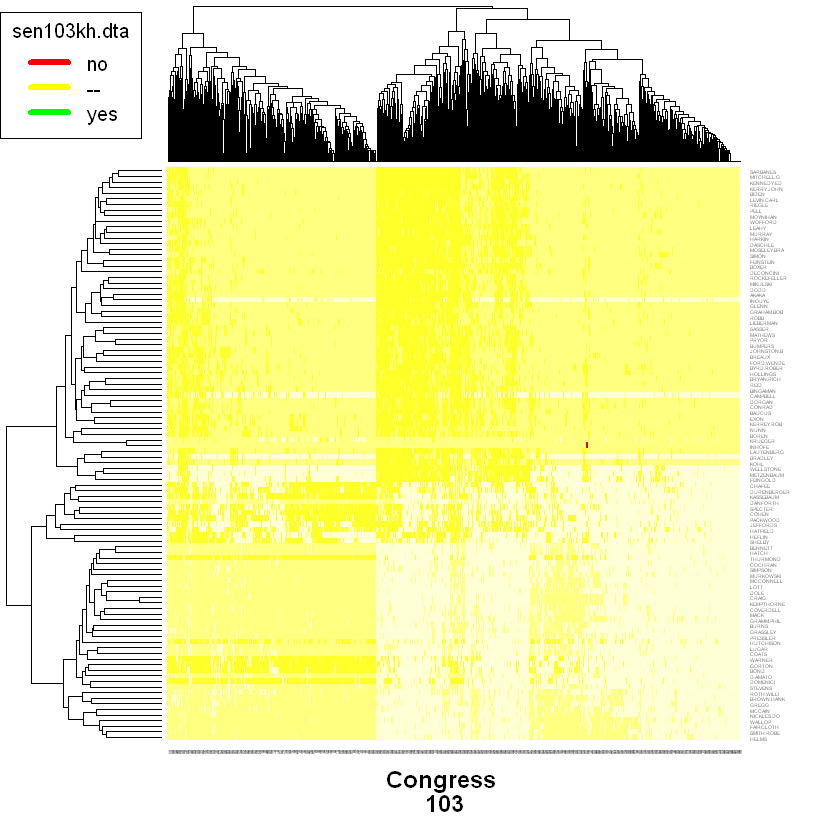

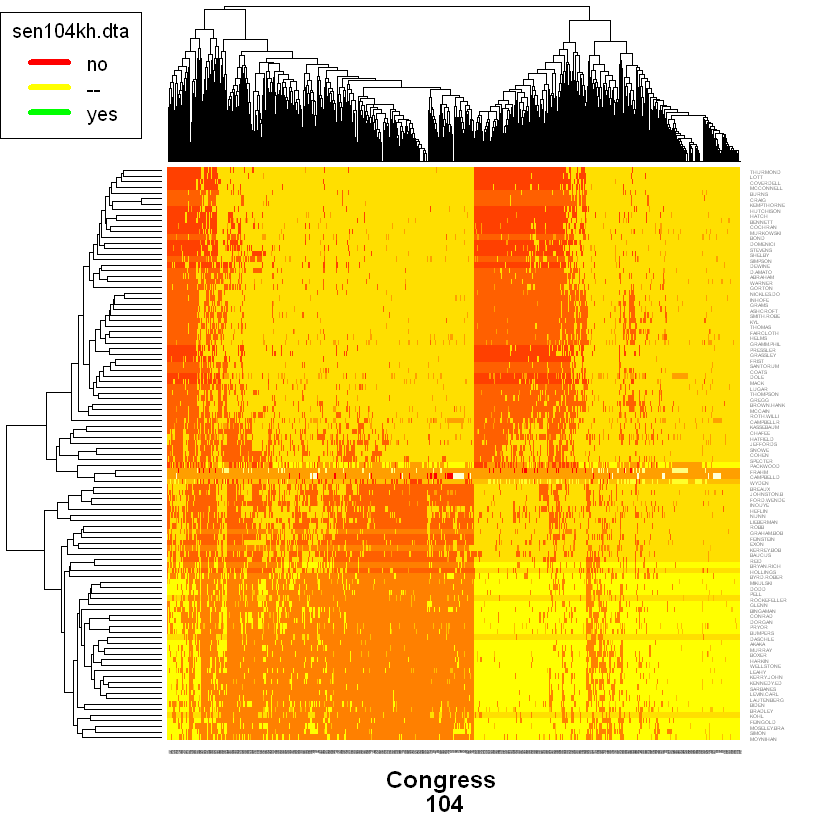

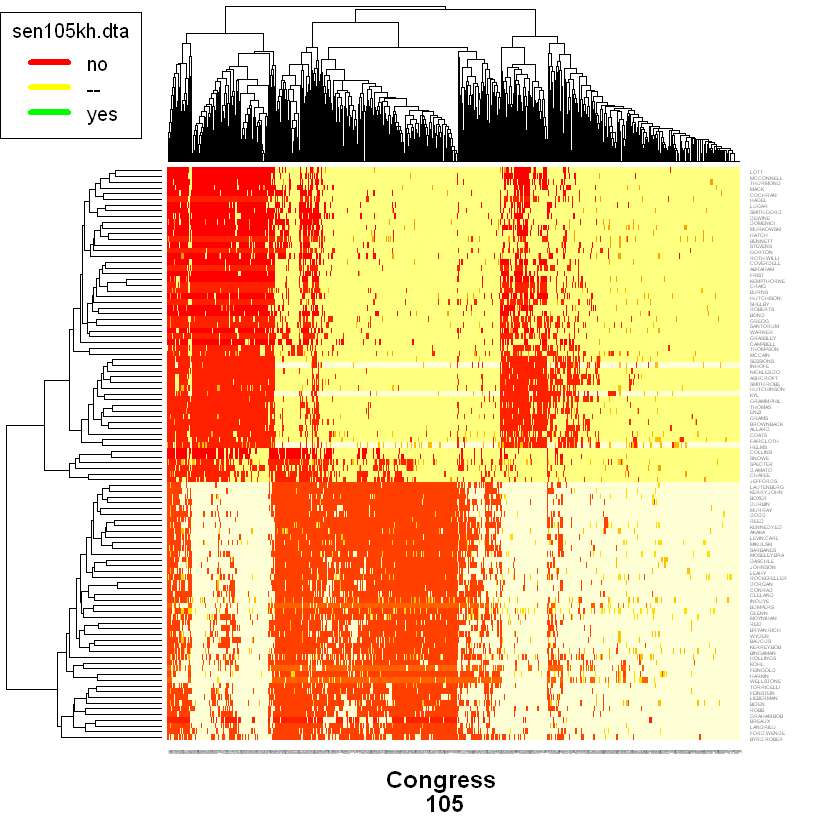

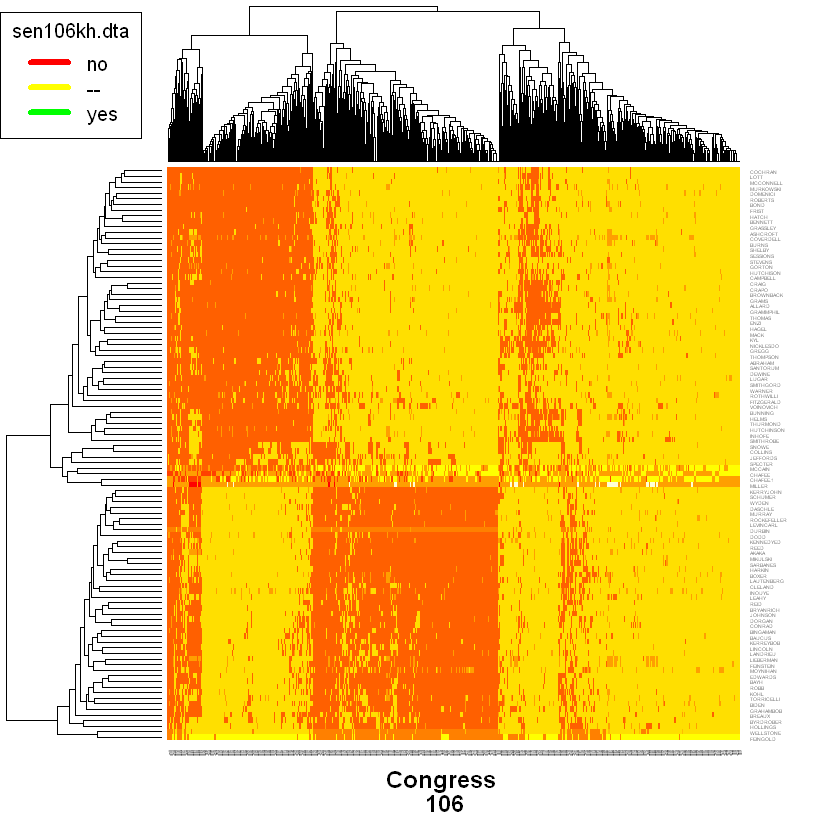

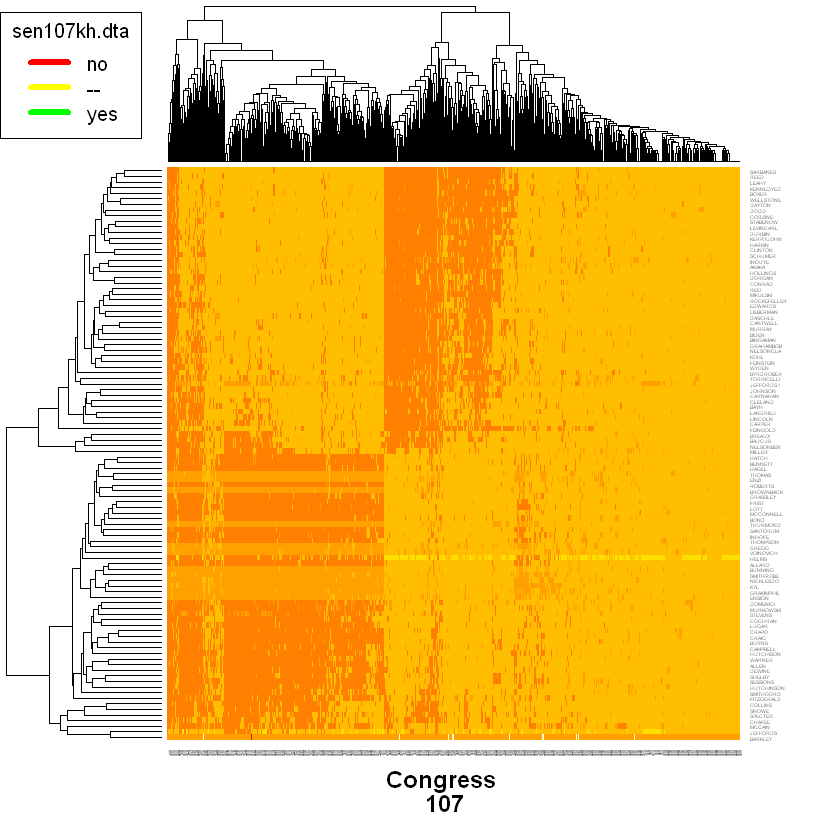

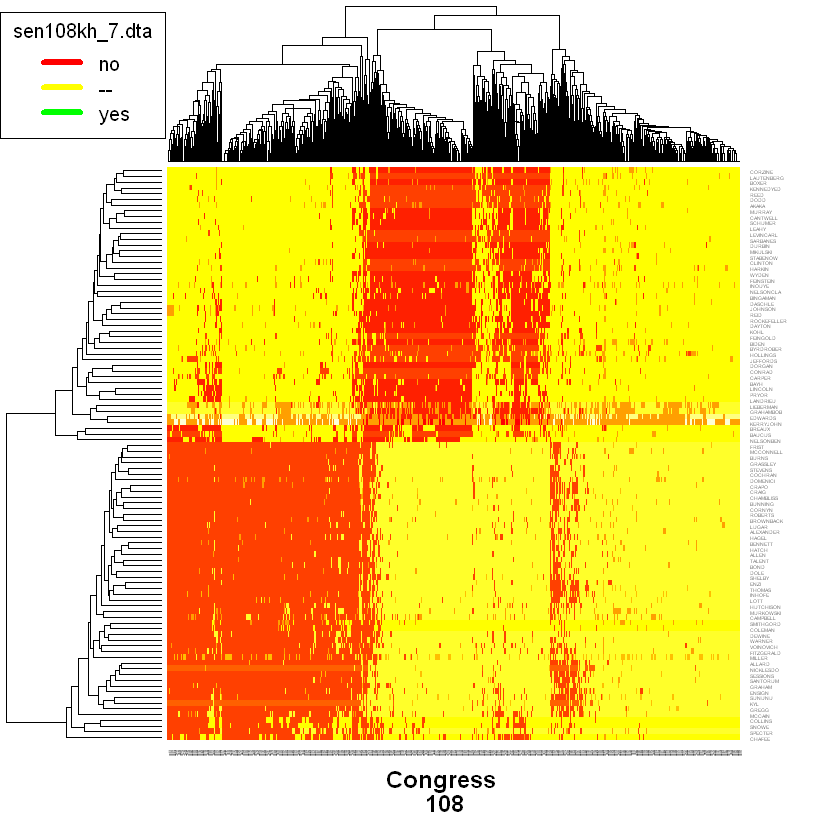

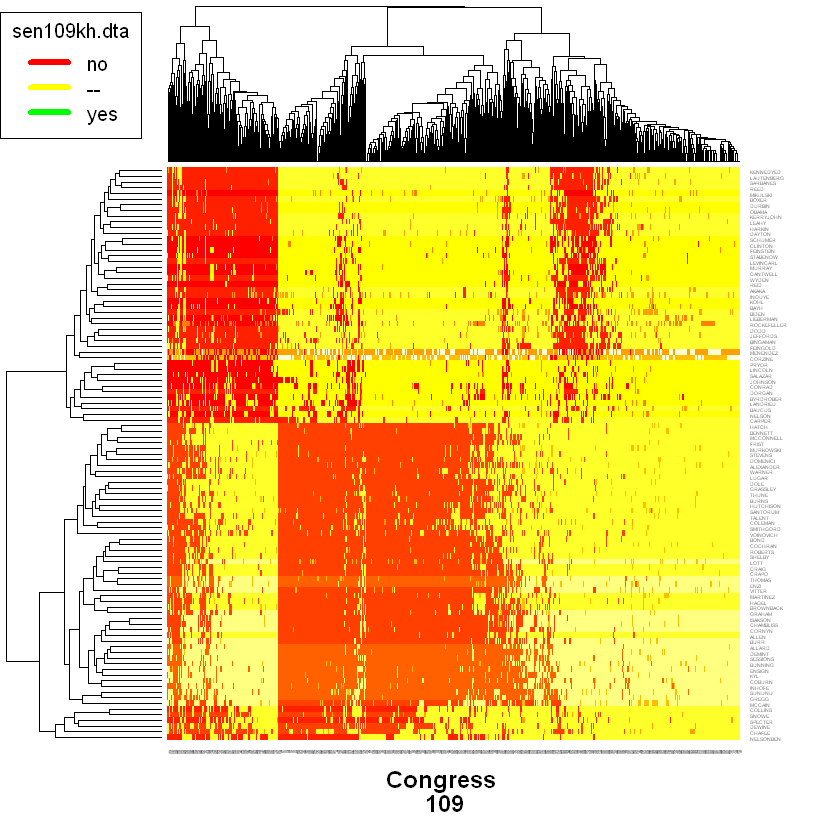

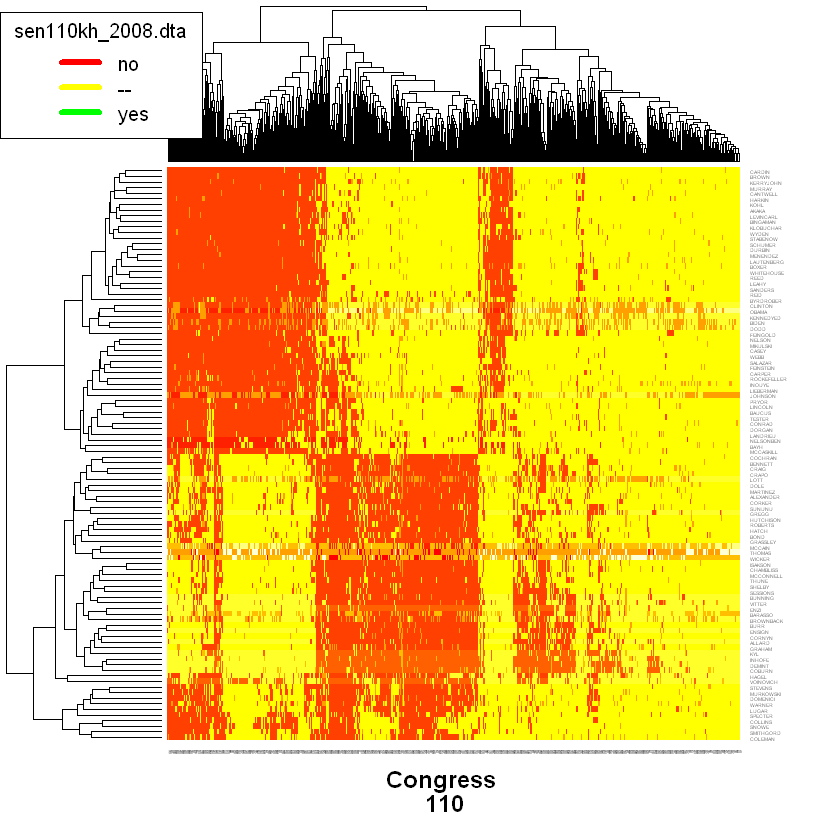

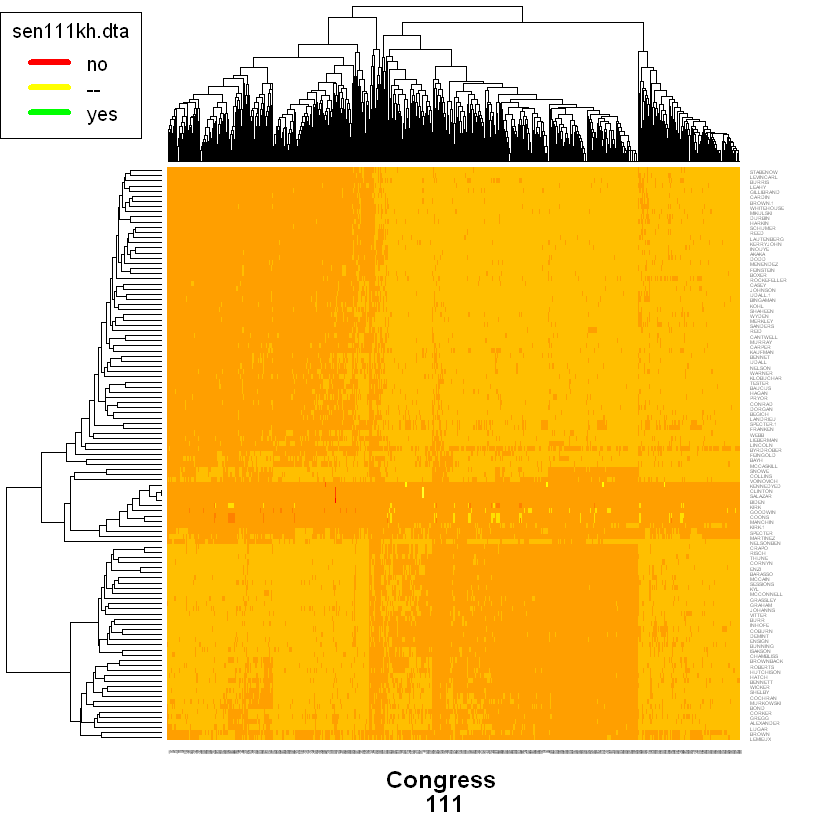

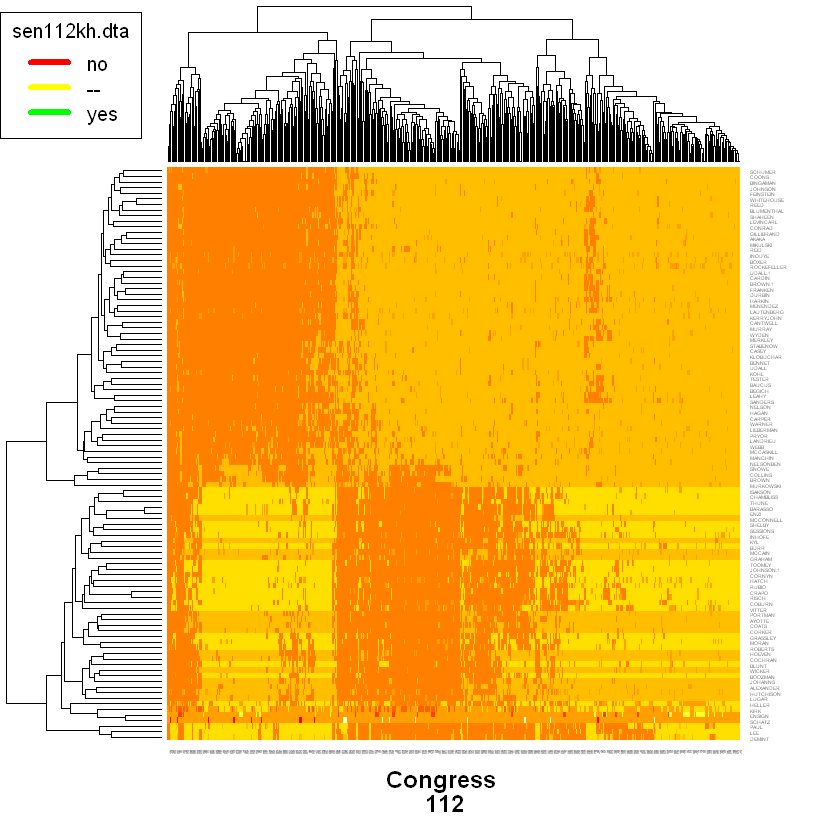

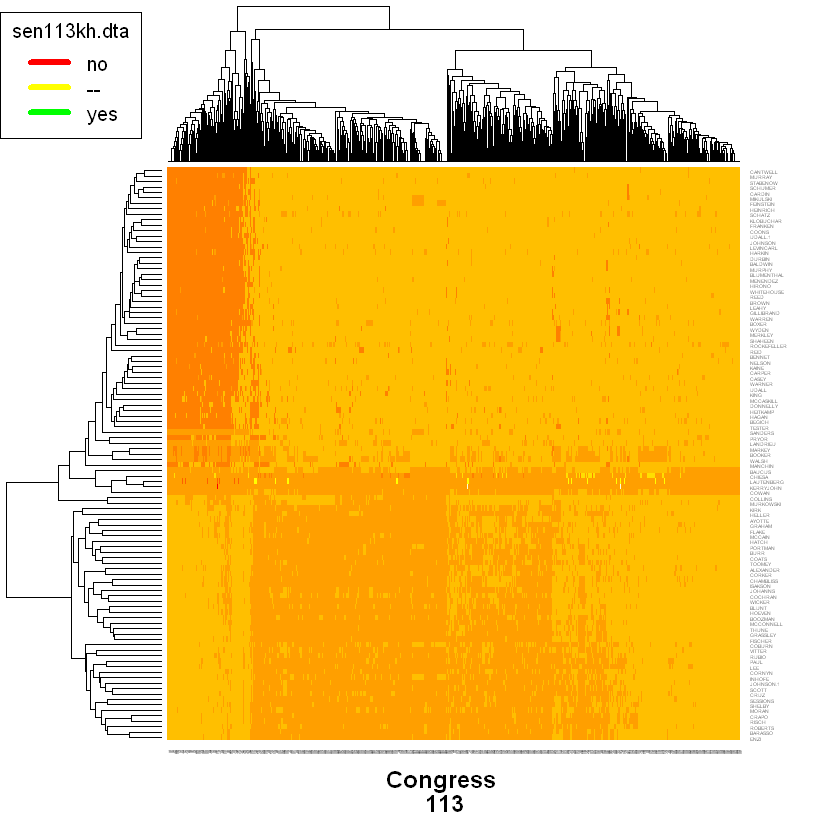

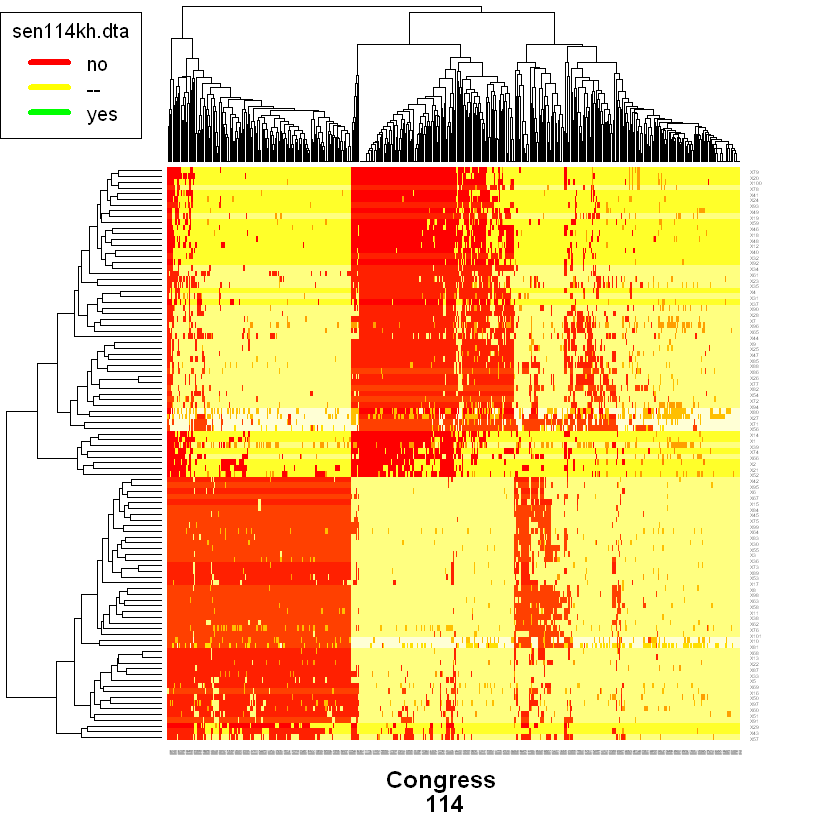

In [66]:
for(i in 1:(length(rollcall.simple))){ # For each Congress...
    voting_history = heatmap(rollcall.simple[[i]], cexRow = 0.3, cexCol = 0.1) # Create a heatmap
    
    par(xpd=TRUE) # Offset the legend
    # Create color legend
    legend("topleft", inset=c(-0.15,-0.15), legend=c("no", "--", "yes"), lty=c(1,1), lwd=5, col=c("red", "yellow", "green"), title = data.files[i])
    
    heatmap_title =paste(c("Congress ", rollcall.data[[i]]$cong[[i]])) # Concatenate heatmap label and Congress number into a string
    title(main = heatmap_title, line = -29) # Title for the heapmap
}    

## (d) Extend the notebook to include a model of polarization and explain why it is a good measure of polarization

In [20]:
# Function to calculate the amount of polarization
polarization <- function(cong){

    # get the IDs of the different parties (e.g. 100, 200)
    party = unique(rollcall.mds[[cong]][,"party"])
    num_of_parties = length(party) # get the number of parties

    party_coords <- numeric(0) # Vector to store each party's coordinates
    for(i in party) { # for each party...
        party_subset = subset(rollcall.mds[[cong]], party == i) # create a subset of just that party's information (e.g., only Dems)

        party_x = sum((party_subset[,"x"]))/length(party_subset[,"x"]) # get the average x-coord of that party
        party_coords<- c(party_coords, party_x)
        party_y = sum((party_subset[,"y"]))/length(party_subset[,"y"]) # get the average y-coord of that party
        party_coords <- c(party_coords, party_y) # e.g., [1]Dem x-coord [2]Dem y-coord [3]Rep x-coord [4]Rep y-coord
    }

    senate_average_x = sum((rollcall.mds[[cong]][,"x"]))/length(rollcall.mds[[cong]][,"x"]) # all parties x-coord
    senate_average_y = sum((rollcall.mds[[cong]][,"y"]))/length(rollcall.mds[[cong]][,"y"]) # all parties y-coord

    party_distance_average <- numeric(0) # Vector to store each party's distance from the Senate average

    j = 0 # Set j to zero so that you can track both odd (j) and even (j+1) indexes
    for(i in 1:num_of_parties) {
        j = j + 1 # Increment back to odd value
        # use distance formula to get distance from all parties xy-coord to each party's xy-coord
        party_distance_average = c(party_distance_average, sqrt((senate_average_x - party_coords[j])^2 + (senate_average_y - party_coords[j+1])^2))
    }

    party_vote_share <- numeric(0) # Vector to store the percentage of each party's votes used
    for(i in party) { # For each party...
        party_vote_subset = subset(rollcall.data[[cong]], party == i) # get each party's voting subset

        party_vote_yes = sum(party_vote_subset == 1)
        party_vote_no = sum(party_vote_subset == 9)
        party_vote = party_vote_yes + party_vote_no # get all party's votes

        party_vote_total = dim(party_vote_subset)[1] * (dim(party_vote_subset)[2] - 1) # get all party's allowed votes (absences included)

        party_vote_share_percentage = party_vote/party_vote_total # get party voting share

        party_vote_share <- c(party_vote_share, party_vote_share_percentage) # combine all parties voting share into a vector
    }

    polarization = 0 # Initialize polarization value, set to zero
    for(i in length(party)) { # For the number of parties...
        # get sum of each parties vote share times ((their distance average divided by the number of parties) squared)
        polarization = polarization + (party_vote_share[i] * ((party_distance_average[i])/num_of_parties)^2) 
    }
    polarization_final = sqrt(polarization) # take the square root of the sum to get the measure of polarization

    return (polarization_final) # Return polarization figure
}

### Why this is a good measure of polarization

This is a good measure of polarization because it measures both the similarity of intra-party votes, and dissimilarity of cross-party votes. This is a modification of the model proposed by Dalton, R. (2008) in "The quantity and quality of party systems: party system polarization, its measurement, and its consequences." 

I got the xy-coordinates of the average voting of each party, as well as the xy-coordinates of the average voting of all parties combined. From that, I calculated the distance measure from the party voting average coordinates to the entire Senate coordinates. This accounts for both intra-party and inter-party differences. 

This is divided by the number of parties used in each Congress, and squared per Dalton's formula. I modified the formula slightly since Dalton used five different parties and had a division by five as a constant. Instead, I just divided by the number of parties used.

This is multiplied by the party_vote_share, or the percentage of votes actually used by the party. This translates into voting "power" that each party used. Each total from each party was summed together and the square root was taken, again according to the formula of Dalton (2008).

While earlier polarization between parties was considerably lower, so too was the intra-party votes. As polarity betweeen the two large parties increased, so did the amount of dissimilarity between each party, which accounts for the figures year to year below. If warranted, future measures can be used to more heavily weigh the differences between parties.

## (e) calculate your measure of polarization for each Congress

In [21]:
for(i in 1:length(data.files)) # For each of the data files...
{
    # Label for each polarization value
    polarization_label = paste(c("Polarization of Congress", rollcall.data[[i]][,1][1], ": ", polarization(i)), collapse = " ")
    cat(polarization_label, "\n") # Print polarization values
}

Polarization of Congress 103 :  985.756041192713 
Polarization of Congress 104 :  1429.45927234869 
Polarization of Congress 105 :  885.448690509225 
Polarization of Congress 106 :  1131.91767692707 
Polarization of Congress 107 :  372.015962810924 
Polarization of Congress 108 :  838.288614836275 
Polarization of Congress 109 :  777.750707790598 
Polarization of Congress 110 :  601.813202869576 
Polarization of Congress 111 :  680.869392708252 
Polarization of Congress 112 :  450.327054675962 
Polarization of Congress 113 :  853.460396610658 
Polarization of Congress 114 :  638.029645456719 


## (f) plot the timeline showing the value of your polarization measure for each Congress

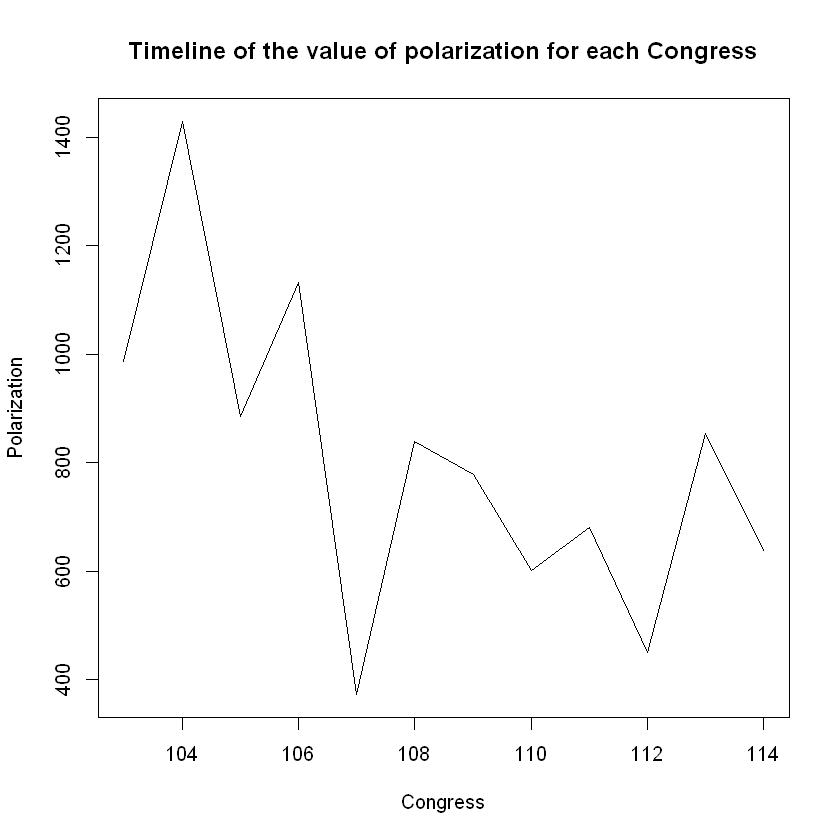

In [22]:
cong_num <- numeric(0) # Vector for Congress number
pol_vec <- numeric(0) # Vector for the polarization values
for(i in 1:length(data.files)){ # For each of the data files...
    cong_num = c(cong_num, rollcall.data[[i]][,1][1]) # Add the Congress number to the vector
    pol_vec = c(pol_vec, polarization(i)) # Add the polarization value to the vector
}
# Graph the number of Congress against its polarization value
plot(cong_num, pol_vec, type="l", main="Timeline of the value of polarization for each Congress", xlab="Congress", ylab="Polarization") 